In [1]:
!pip install folium

In [2]:
#import ray
#import tensorflow as tf

import time
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly_express as px
import folium

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#import dataset
db = pd.read_csv("tracklets.csv")
db

,idtracklet|id1|mmsi1|speed1|course1|heading1|lon1|lat1|ts1|id2|mmsi2|speed2|course2|heading2|lon2|lat2|ts2|id3|mmsi3|speed3|course3|heading3|lon3|lat3|ts3|id4|mmsi4|speed4|course4|heading4|lon4|lat4|ts4|id5|mmsi5|speed5|course5|heading5|lon5|lat5|ts5|route
0,1|4128997|228005700|6.7|175|511|-4.551695|48.3...
1,2|14817869|249104000|8.7|69|69|-4.733975|48.30...
2,3|8618319|228017700|14.6|83.7|86|-4.885512|48....
3,4|16024159|227008170|12.3|125|126|-4.924165|48...
4,5|2144526|228017700|16.5|73.4|73|-4.550415|48....
...,...
795,796|3554186|227730220|19.1|56.9|511|-4.639665|...
796,797|1585479|227005550|23.1|68.9|511|-4.547798|...
797,798|2761022|258316000|12.1|338|332|-5.186498|4...
798,799|5167729|228186700|10.9|104|103|-4.465165|4...


In [4]:
#re-import dataset and set delimiter
db = pd.read_csv("tracklets.csv", sep="|")
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


In [5]:
#examine dataset
print("---cc---")
print(db.info())

---cc---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idtracklet  800 non-null    int64  
 1   id1         800 non-null    int64  
 2   mmsi1       800 non-null    int64  
 3   speed1      800 non-null    float64
 4   course1     800 non-null    float64
 5   heading1    800 non-null    int64  
 6   lon1        800 non-null    float64
 7   lat1        800 non-null    float64
 8   ts1         800 non-null    int64  
 9   id2         800 non-null    int64  
 10  mmsi2       800 non-null    int64  
 11  speed2      800 non-null    float64
 12  course2     800 non-null    float64
 13  heading2    800 non-null    int64  
 14  lon2        800 non-null    float64
 15  lat2        800 non-null    float64
 16  ts2         800 non-null    int64  
 17  id3         800 non-null    int64  
 18  mmsi3       800 non-null    int64  
 19  speed3      800 non-

In [6]:
print("Tracklets Rows: ", db.shape[0])
print("Tracklets Columns: ", db.shape[1])

Tracklets Rows:  800
Tracklets Columns:  42


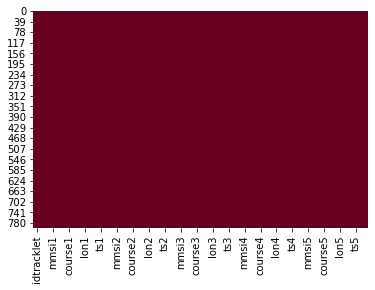

In [7]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [8]:
#drop potential na values
db.dropna(inplace=True)
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


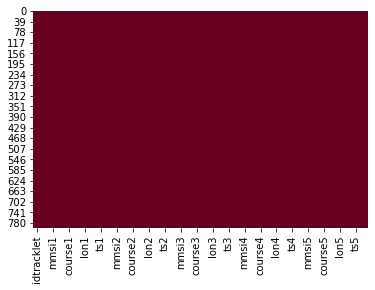

In [9]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [10]:
#only needed if you need to read the UNIX timestamps

#process timestamps to human readable format
#db['ts1'] = pd.to_datetime(db['ts1'], unit='s')
#db['ts2'] = pd.to_datetime(db['ts2'], unit='s')
#db['ts3'] = pd.to_datetime(db['ts3'], unit='s')
#db['ts4'] = pd.to_datetime(db['ts4'], unit='s')
#db['ts5'] = pd.to_datetime(db['ts5'], unit='s')
#db

In [11]:
#introduce a correlation matrix
cm = db.corr()

In [12]:
#feature and target selection
features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']  
targets = ['lon1', 'lat1', 'lon2', 'lat2', 'lon3', 'lat3', 'lon4', 'lat4', 'lon5', 'lat5']  

x = db[features]
y = db[targets]

original_lon1 = db["lon1"]
original_lat1 = db["lat1"]

In [13]:
#examine x then y
x

,speed1,course1,heading1,ts1,speed2,course2,heading2,ts2,speed3,course3,heading3,ts3,speed4,course4,heading4,ts4,speed5,course5,heading5,ts5
0,6.7,175.0,511,1447148032,6.9,175.5,511,1447148061,2.8,215.6,511,1447148092,2.1,337.5,511,1447148121,3.9,325.8,511,1447148153
1,8.7,69.0,69,1456438812,8.5,69.1,68,1456438821,8.5,68.3,69,1456438832,8.6,67.9,69,1456438842,8.5,68.5,69,1456438851
2,14.6,83.7,86,1451215056,14.7,83.7,86,1451215063,14.7,83.8,86,1451215069,14.6,84.1,87,1451215075,14.7,84.3,88,1451215081
3,12.3,125.0,126,1457099514,12.6,130.0,125,1457099516,12.8,132.0,124,1457099521,12.5,131.0,121,1457099527,12.4,130.0,119,1457099531
4,16.5,73.4,73,1445447976,16.0,70.3,69,1445448036,15.8,70.5,71,1445448052,16.1,72.8,73,1445448112,16.0,72.7,71,1445448122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,19.1,56.9,511,1446681907,19.5,57.7,511,1446681913,19.9,59.2,511,1446681919,19.0,55.4,511,1446681925,19.5,55.2,511,1446681932
796,23.1,68.9,511,1444922333,23.2,69.1,511,1444922335,23.2,69.3,511,1444922337,23.2,69.7,511,1444922338,23.2,69.3,511,1444922338
797,12.1,338.0,332,1445959658,12.1,338.0,332,1445959667,12.2,338.0,332,1445959677,12.2,337.0,333,1445959718,12.2,337.0,333,1445959727
798,10.9,104.0,103,1448009887,10.9,104.0,102,1448009889,10.9,105.0,102,1448009890,10.9,107.0,101,1448009892,10.9,105.0,101,1448009893


In [14]:
y

,lon1,lat1,lon2,lat2,lon3,lat3,lon4,lat4,lon5,lat5
0,-4.551695,48.344520,-4.551470,48.343616,-4.551337,48.342773,-4.551582,48.342983,-4.551893,48.343353
1,-4.733975,48.301247,-4.733532,48.301365,-4.732932,48.301537,-4.732377,48.301685,-4.731818,48.301840
2,-4.885512,48.404390,-4.884903,48.404434,-4.884294,48.404472,-4.883685,48.404514,-4.882973,48.404560
3,-4.924165,48.405033,-4.923965,48.404915,-4.923698,48.404750,-4.923248,48.404500,-4.922998,48.404335
4,-4.550415,48.351140,-4.544022,48.352585,-4.542357,48.352993,-4.536008,48.354320,-4.535050,48.354515
...,...,...,...,...,...,...,...,...,...,...
795,-4.639665,48.315987,-4.639073,48.316227,-4.638355,48.316505,-4.637738,48.316814,-4.636951,48.317173
796,-4.547798,48.351620,-4.547500,48.351700,-4.547202,48.351772,-4.546900,48.351845,-4.547202,48.351772
797,-5.186498,48.084835,-5.186832,48.085335,-5.187165,48.086000,-5.188498,48.088000,-5.188832,48.088500
798,-4.465165,48.318333,-4.464998,48.318165,-4.464832,48.318165,-4.464665,48.318165,-4.464665,48.318165


In [15]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#create linear regression model
lon_model = RandomForestRegressor(n_estimators=100, random_state=42)
lat_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
#fit the model
lon_model.fit(X_train, y_train['lon1'])
lat_model.fit(X_train, y_train['lat1'])

RandomForestRegressor(random_state=42)

In [17]:
#predict the model
lon_predictions = lon_model.predict(X_test)
lat_predictions = lat_model.predict(X_test)

In [18]:
#predicted longitude and latitude values

#print(lon_predictions)
#print(lat_predictions)

lon_lat_p = pd.DataFrame({
    "Longitude": lon_predictions,
    "Latitude": lat_predictions
})

lon_lat_p

,Longitude,Latitude
0,-4.470999,48.399191
1,-4.811435,48.119419
2,-4.768926,48.374698
3,-4.777484,48.170624
4,-4.577767,48.213984
...,...,...
155,-4.491386,48.382164
156,-4.803292,48.223749
157,-4.783476,48.281549
158,-4.935067,48.319308


In [19]:
from shapely.geometry import Point
#create a geometry column using Point objects from the shapley library
geometry = [Point(lon, lat) for lon, lat in zip(lon_predictions, lat_predictions)]

#create the GeoDataFrame
geo_df = gpd.GeoDataFrame({
    'Longitude': lon_predictions,
    'Latitude': lat_predictions
}, geometry=geometry)

print(geo_df)

     Longitude   Latitude                   geometry
0    -4.470999  48.399191  POINT (-4.47100 48.39919)
1    -4.811435  48.119419  POINT (-4.81143 48.11942)
2    -4.768926  48.374698  POINT (-4.76893 48.37470)
3    -4.777484  48.170624  POINT (-4.77748 48.17062)
4    -4.577767  48.213984  POINT (-4.57777 48.21398)
..         ...        ...                        ...
155  -4.491386  48.382164  POINT (-4.49139 48.38216)
156  -4.803292  48.223749  POINT (-4.80329 48.22375)
157  -4.783476  48.281549  POINT (-4.78348 48.28155)
158  -4.935067  48.319308  POINT (-4.93507 48.31931)
159  -4.521164  48.275896  POINT (-4.52116 48.27590)

[160 rows x 3 columns]


In [20]:
o_geometry = [Point(lon, lat) for lon, lat in zip(original_lon1, original_lat1)]

#create the GeoDataFrame
o_geo_df = gpd.GeoDataFrame({
    'Longitude': original_lon1,
    'Latitude': original_lat1
}, geometry=o_geometry)

print(o_geo_df)

     Longitude   Latitude                   geometry
0    -4.551695  48.344520  POINT (-4.55169 48.34452)
1    -4.733975  48.301247  POINT (-4.73398 48.30125)
2    -4.885512  48.404390  POINT (-4.88551 48.40439)
3    -4.924165  48.405033  POINT (-4.92417 48.40503)
4    -4.550415  48.351140  POINT (-4.55042 48.35114)
..         ...        ...                        ...
795  -4.639665  48.315987  POINT (-4.63966 48.31599)
796  -4.547798  48.351620  POINT (-4.54780 48.35162)
797  -5.186498  48.084835  POINT (-5.18650 48.08483)
798  -4.465165  48.318333  POINT (-4.46516 48.31833)
799  -4.773423  48.041780  POINT (-4.77342 48.04178)

[800 rows x 3 columns]


In [21]:
#data visualisation

#create a map centered around the mean coordinates of the points
mean_coords = geo_df['geometry'].unary_union.centroid
m = folium.Map(location=[mean_coords.y, mean_coords.x], zoom_start=11)
original_color = (255, 0, 0)  # Red
predicted_color = (0, 0, 255)  # Blue

#add original geometry
for index, row in o_geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x  # Use 'geometry' here
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

#add predictions markers
for index, row in geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    folium.CircleMarker([lat, lon], radius=5, color='red', fill=True, fill_color='red').add_to(m)

#display the map
m

TBA

In [22]:
#choose vessel you want to track
selected_mmsi = 227008170  

#filter dataset for selected vessel
selected_vessel_data = db[db['mmsi1'] == selected_mmsi]

#feature and target selection
selected_features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']
selected_targets = ['lon1', 'lat1']

x_selected = selected_vessel_data[selected_features]
y_selected = selected_vessel_data[selected_targets]

#split training and testing data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42)

#create models
lon_model_sel = RandomForestRegressor(n_estimators=100, random_state=42)
lat_model_sel = RandomForestRegressor(n_estimators=100, random_state=42)

#fit models
lon_model_sel.fit(X_train_sel, y_train_sel['lon1'])
lat_model_sel.fit(X_train_sel, y_train_sel['lat1'])

#predict models
lon_predictions_sel = lon_model_sel.predict(X_test_sel)
lat_predictions_sel = lat_model_sel.predict(X_test_sel)

#create the DataFrame for the predicted value
lon_lat_p_sel = pd.DataFrame({
    "Longitude": lon_predictions_sel,
    "Latitude": lat_predictions_sel
})

#create thee GeoDataFrames
geometry_sel = [Point(lon, lat) for lon, lat in zip(lon_predictions_sel, lat_predictions_sel)]
geo_df_sel = gpd.GeoDataFrame({
    'Longitude': lon_predictions_sel,
    'Latitude': lat_predictions_sel
}, geometry=geometry_sel)

selected_geometry = [Point(lon, lat) for lon, lat in zip(selected_vessel_data['lon1'], selected_vessel_data['lat1'])]
selected_geo_df = gpd.GeoDataFrame({
    'Longitude': selected_vessel_data['lon1'],
    'Latitude': selected_vessel_data['lat1']
}, geometry=selected_geometry)

#add an 'Origin' column to indicate whether a position is 'Original' or 'Predicted'
selected_geo_df['Origin'] = 'Original'
geo_df_sel['Origin'] = 'Predicted'

#combine original and predicted positions into a single GeoDataFrame
combined_geo_df = pd.concat([selected_geo_df, geo_df_sel])

#create a map centered around the mean coordinates of the points
mean_coords_combined = combined_geo_df['geometry'].unary_union.centroid
m_combined = folium.Map(location=[mean_coords_combined.y, mean_coords_combined.x], zoom_start=9)

#add the combined GeoDataFrame as map markers
for index, row in combined_geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    origin = row['Origin']

    if origin == 'Original':
        color = 'blue'
        label = f"Original {index}" 
    else:
        color = 'red'
        label = f"Predicted {index}"  

    folium.CircleMarker([lat, lon], radius=5, color=color, fill=True, fill_color=color, popup=folium.Popup(label)).add_to(m_combined)

#display the map
m_combined


Here we can see that the route is generally more "accurate" to actual route positions, visually at least. However, errors in this case are contributed to poor data collection for the original "true" data, where AIS has distributed geo-spatial data as being on land. There could be a valid reason for this, such as docking. 

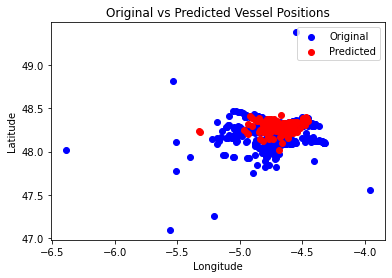

In [23]:
# Scatter plot
plt.scatter(o_geo_df['Longitude'], o_geo_df['Latitude'], color="blue", label='Original')
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], color="red", label='Predicted')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Predicted Vessel Positions')

# Add legend
plt.legend()

# Show the plot
plt.show()

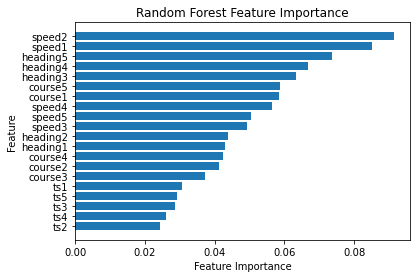

In [24]:
import matplotlib.pyplot as plt

feature_importances = lon_model.feature_importances_  # or lat_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

# MODEL EVALUATION

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
# Calculate prediction errors

lon_errors = y_test['lon1'] - lon_predictions
lat_errors = y_test['lat1'] - lat_predictions

o_lon_errors = y_test['lon1'] - original_lon1
o_lat_errors = y_test['lat1'] - original_lat1

# Calculate standard deviation of errors

lon_std_dev = np.std(lon_errors)
lat_std_dev = np.std(lat_errors)

o_lon_std_dev = np.std(o_lon_errors)
o_lat_std_dev = np.std(o_lat_errors)

In [27]:
print(f"Longitude Standard Deviation: {lon_std_dev}")
print(f"Latitude Standard Deviation: {lat_std_dev}")
print(f"Original Longitude Standard Deviation: {o_lon_std_dev}")
print(f"Original Latitude Standard Deviation: {o_lat_std_dev}")

Longitude Standard Deviation: 0.15781871936065864
Latitude Standard Deviation: 0.1405286748538807
Original Longitude Standard Deviation: 0.0
Original Latitude Standard Deviation: 0.0


In [28]:
#Calculate Mean Squared Error.

lon_mse = mean_squared_error(y_test['lon1'], lon_predictions)
lat_mse = mean_squared_error(y_test['lat1'], lat_predictions)
print(f"Longitude MSE: {lon_mse}")
print(f"Latitude MSE: {lat_mse}")

Longitude MSE: 0.024933007120180997
Latitude MSE: 0.02004396055453348


In [31]:
#RMSE evaluation
#perform k-fold cross-validation
lon_predictions_cv = cross_val_predict(lon_model, x_selected, y_selected['lon1'], cv=5)
lat_predictions_cv = cross_val_predict(lat_model, x_selected, y_selected['lat1'], cv=5)

lon_rmse = np.sqrt(mean_squared_error(y_selected['lon1'], lon_predictions_cv))
lat_rmse = np.sqrt(mean_squared_error(y_selected['lat1'], lat_predictions_cv))

print(f"Longitude RMSE: {lon_rmse}")
print(f"Latitude RMSE: {lat_rmse}")


Longitude RMSE: 0.1051788117487334
Latitude RMSE: 0.037912819447789306


In [32]:
#Calculate MAE (Mean Absolute Error)

lon_mae = mean_absolute_error(y_test['lon1'], lon_predictions)
lat_mae = mean_absolute_error(y_test['lat1'], lat_predictions)

print(f"Longitude MAE: {lon_mae}")
print(f"Latitude MAE: {lat_mae}")

Longitude MAE: 0.10811002419374986
Latitude MAE: 0.082135345624999


In [33]:
#R-squared evaluation
lon_r2 = r2_score(y_test['lon1'], lon_predictions)
lat_r2 = r2_score(y_test['lat1'], lat_predictions)

print(f"Longitude R-squared: {lon_r2}")
print(f"Latitude R-squared: {lat_r2}")

Longitude R-squared: 0.3550804016696846
Latitude R-squared: 0.22179582528262165


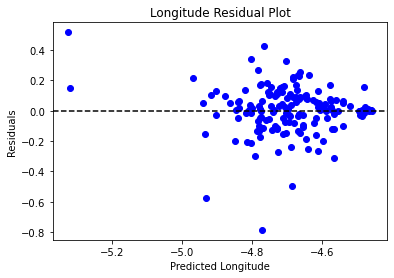

In [34]:
lon_residuals = y_test['lon1'] - lon_predictions

plt.scatter(lon_predictions, lon_residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Longitude')
plt.ylabel('Residuals')
plt.title('Longitude Residual Plot')
plt.show()

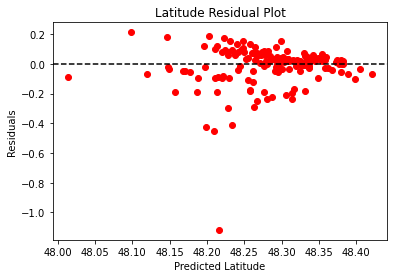

In [35]:
lat_residuals = y_test['lat1'] - lat_predictions

plt.scatter(lat_predictions, lat_residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Latitude')
plt.ylabel('Residuals')
plt.title('Latitude Residual Plot')
plt.show()